In [249]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import autoplotter
from autoplotter import run_app
from PIL import Image
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings("ignore")

In [307]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [308]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [309]:
df_train.shape

(614, 13)

In [310]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [311]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [312]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [313]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

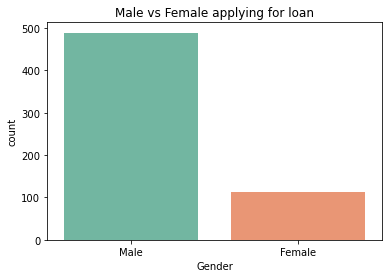

In [314]:
sns.countplot(df_train.Gender,palette="Set2")
plt.title("Male vs Female applying for loan")
plt.show()

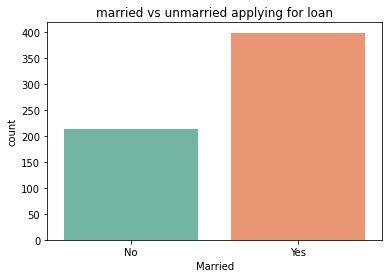

In [315]:
sns.countplot(df_train.Married,palette="Set2")
plt.title("married vs unmarried applying for loan")
plt.show()

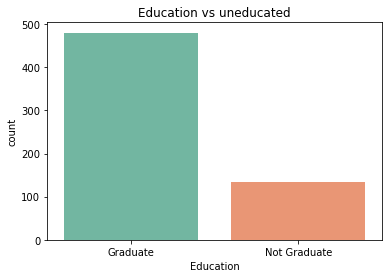

In [316]:
sns.countplot(df_train.Education,palette="Set2")
plt.title("Education vs uneducated")
plt.show()

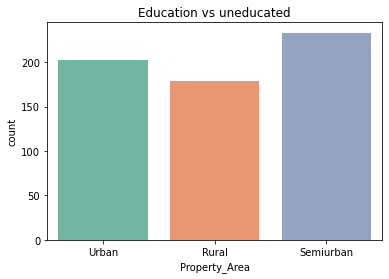

In [317]:
sns.countplot(df_train.Property_Area,palette="Set2")
plt.title("Education vs uneducated")
plt.show()

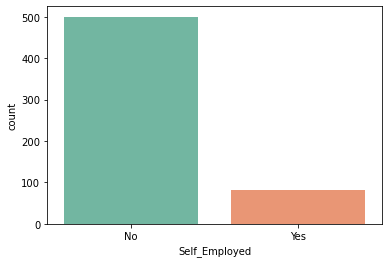

In [318]:
sns.countplot(df_train.Self_Employed,palette="Set2")
plt.show()

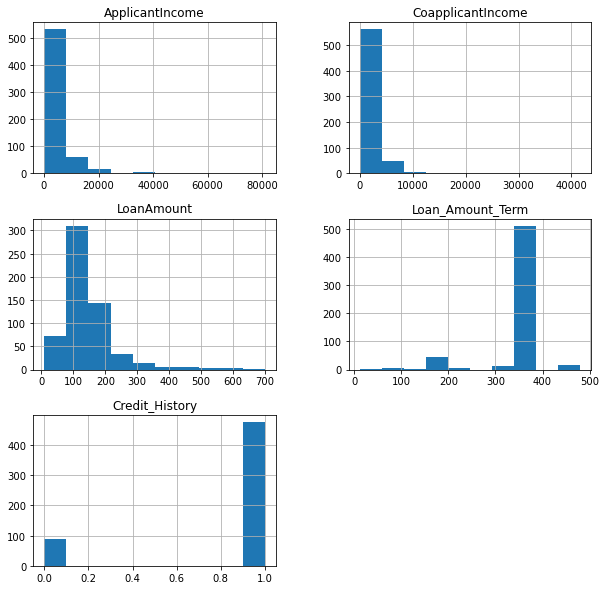

In [319]:
df.hist(figsize=(10,10))
plt.show()

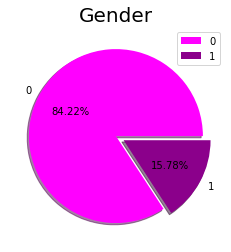

In [320]:
labels = ['0', '1']
size = df_train['Credit_History'].value_counts()
colors = ['magenta', 'darkmagenta']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

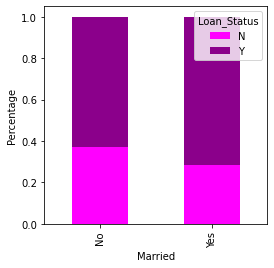

In [321]:
Married=pd.crosstab(df_train["Married"],df_train["Loan_Status"])
#Married=df.pivot_table(df_train["Married"],df_train["Loan_Status"],)
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color=('magenta','darkmagenta'))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

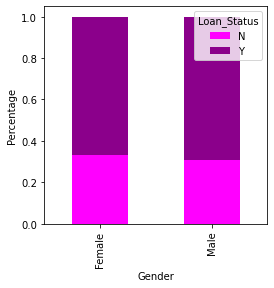

In [322]:
Gender=pd.crosstab(df_train["Gender"],df_train["Loan_Status"])
#Married=df.pivot_table(df_train["Married"],df_train["Loan_Status"],)
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color=('magenta','darkmagenta'))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

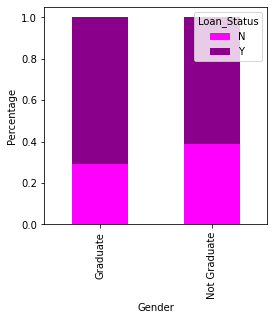

In [323]:
Education=pd.crosstab(df_train["Education"],df_train["Loan_Status"])
#Married=df.pivot_table(df_train["Married"],df_train["Loan_Status"],)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color=('magenta','darkmagenta'))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

In [324]:
df_train['Total_income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [325]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


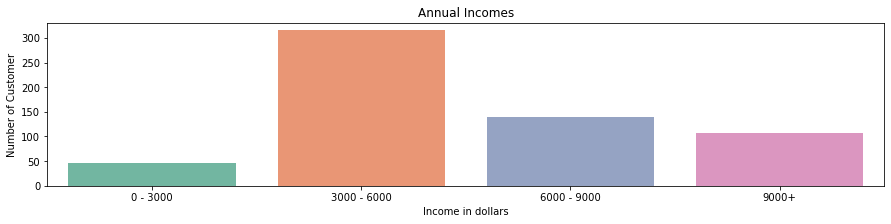

In [326]:
in0_3000=df_train['Total_income'][(df_train.Total_income >0 ) & (df_train.Total_income <3000 )]
in3000_6000=df_train['Total_income'][(df_train.Total_income >3000 ) & (df_train.Total_income <6000 )]
in6000_9000=df_train['Total_income'][(df_train.Total_income >6000 ) & (df_train.Total_income <9000 )]
in9000above=df_train['Total_income'][(df_train.Total_income >9000 )]

x = ["0 - 3000", "3000 - 6000", "6000 - 9000", "9000+"]
y = [len(in0_3000), len(in3000_6000), len(in6000_9000), len(in9000above)]

plt.figure(figsize=(15,3))
sns.barplot(x=x, y=y, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income in dollars")
plt.ylabel("Number of Customer")
plt.show()

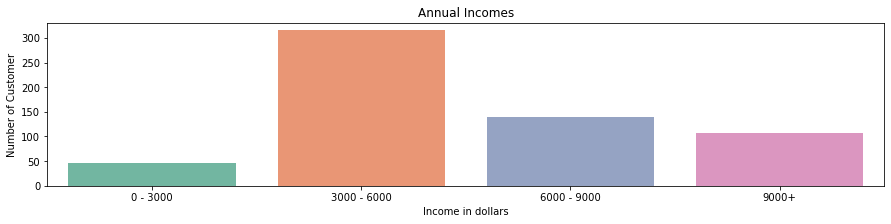

In [327]:
in0_3000=df_train['Total_income'][(df_train.Total_income >0 ) & (df_train.Total_income <3000 )]
in3000_6000=df_train['Total_income'][(df_train.Total_income >3000 ) & (df_train.Total_income <6000 )]
in6000_9000=df_train['Total_income'][(df_train.Total_income >6000 ) & (df_train.Total_income <9000 )]
in9000above=df_train['Total_income'][(df_train.Total_income >9000 )]

x = ["0 - 3000", "3000 - 6000", "6000 - 9000", "9000+"]
y = [len(in0_3000), len(in3000_6000), len(in6000_9000), len(in9000above)]

plt.figure(figsize=(15,3))
sns.barplot(x=x, y=y, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income in dollars")
plt.ylabel("Number of Customer")
plt.show()

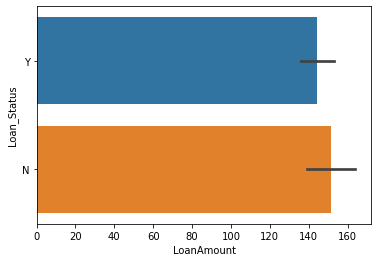

In [328]:
sns.barplot(df.LoanAmount,df.Loan_Status)
plt.show()

In [329]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

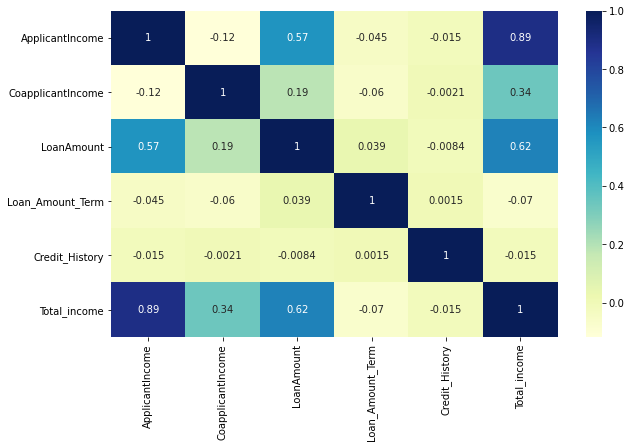

In [330]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [332]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0],inplace=True)
df_train["Married"].fillna(df_train["Married"].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train["Dependents"].mode()[0],inplace=True)
df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0],inplace=True)
df_train["Credit_History"].fillna(df_train["Credit_History"].mode()[0],inplace=True)
df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mode()[0],inplace=True)
df_train["LoanAmount"].fillna(df_train["LoanAmount"].median(),inplace=True)

In [333]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

In [334]:
df_test["Gender"].fillna(df_test["Gender"].mode()[0],inplace=True)
df_test["Married"].fillna(df_test["Married"].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test["Dependents"].mode()[0],inplace=True)
df_test["Self_Employed"].fillna(df_test["Self_Employed"].mode()[0],inplace=True)
df_test["Credit_History"].fillna(df_test["Credit_History"].mode()[0],inplace=True)
df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mode()[0],inplace=True)
df_test["LoanAmount"].fillna(df_test["LoanAmount"].median(),inplace=True)

In [335]:
df_test["Total_income"]=df_test["CoapplicantIncome"]+df["ApplicantIncome"]

In [336]:
df_train.drop("Loan_ID",axis=1,inplace=True)
df_test.drop("Loan_ID",axis=1,inplace=True)

In [337]:
df_train.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Total_income         5.633449
dtype: float64

In [338]:
df_train.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)
df_test.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

In [340]:
df_train["Total_income"]=np.log(df_train["Total_income"])

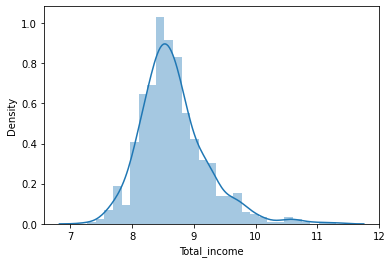

In [341]:
sns.distplot(df_train["Total_income"])
plt.show()

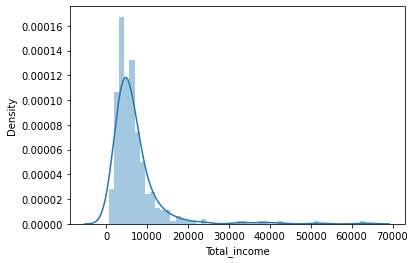

In [342]:
sns.distplot(df_test["Total_income"])
plt.show()

In [354]:
df_train=pd.get_dummies(df_train,drop_first=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [356]:
df_train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,128.0,360.0,1.0,8.674026,1,0,0,0,0,0,0,0,1,1
1,128.0,360.0,1.0,8.714568,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,8.006368,1,1,0,0,0,0,1,0,1,1
3,120.0,360.0,1.0,8.505323,1,1,0,0,0,1,0,0,1,1
4,141.0,360.0,1.0,8.699515,1,0,0,0,0,0,0,0,1,1


In [347]:
train=df_train
test=df_test

In [357]:
df_test.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,110.0,360.0,1.0,5849.0,1,1,0,0,0,0,0,0,1
1,126.0,360.0,1.0,6083.0,1,1,1,0,0,0,0,0,1
2,208.0,360.0,1.0,4800.0,1,1,0,1,0,0,0,0,1
3,100.0,360.0,1.0,5129.0,1,1,0,1,0,0,0,0,1
4,78.0,360.0,1.0,6000.0,1,0,0,0,0,1,0,0,1


In [362]:
x=df_train.drop("Loan_Status_Y",axis=1)
y=df_train["Loan_Status_Y"]

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [364]:
cv_Dtree=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5)
print(np.mean(cv_Dtree))

0.708695652173913


In [365]:
cv_LogisR=cross_val_score(LogisticRegression(),x_train,y_train,cv=5)
print(np.mean(cv_LogisR))

0.8043478260869564


In [366]:
cv_Bagging=cross_val_score(BaggingClassifier(),x_train,y_train,cv=5)
print(np.mean(cv_Bagging))

0.7782608695652172


**From the above we can say our logistic regression model is giving high accuracy so we will be using th model for further implementation**

In [367]:
LR=LogisticRegression()
LR=LR.fit(x_train,y_train)

In [368]:
LR=LR.predict(x_test)

In [370]:
print(accuracy_score(y_test,LR))

0.8116883116883117


In [371]:
cr=classification_report(y_test,LR)

In [372]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.32      0.47        41
           1       0.80      0.99      0.89       113

    accuracy                           0.81       154
   macro avg       0.86      0.65      0.68       154
weighted avg       0.83      0.81      0.78       154



**Checking multicollinearity and dropping features which have high multicollinearity**

In [400]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [401]:
x=df.drop("Loan_Status_Y",axis=1)
calc_vif(x)

,variables,VIF
0,Credit_History,4.403375
1,Gender_Male,5.133441
2,Married_Yes,3.702565
3,Dependents_1,1.367029
4,Dependents_2,1.427844
5,Dependents_3+,1.217250
6,Education_Not Graduate,1.257276
7,Self_Employed_Yes,1.160254
8,Property_Area_Semiurban,1.991977
9,Property_Area_Urban,1.893492


In [402]:
df_train["EMI"]=df_train["LoanAmount"]/df_train["Loan_Amount_Term"]
#df_test["EMI"]=df_test["LoanAmount"]/df_test["Loan_Amount_Term"]

In [403]:
df=df_train.drop(["LoanAmount","Loan_Amount_Term","Total_income"],axis=1)
df.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,EMI
0,1.0,1,0,0,0,0,0,0,0,1,1,0.355556
1,1.0,1,1,1,0,0,0,0,0,0,0,0.355556
2,1.0,1,1,0,0,0,0,1,0,1,1,0.183333
3,1.0,1,1,0,0,0,1,0,0,1,1,0.333333
4,1.0,1,0,0,0,0,0,0,0,1,1,0.391667


In [404]:
x=df.drop("Loan_Status_Y",axis=1)
y=df["Loan_Status_Y"]

In [405]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [406]:
LR=LogisticRegression()
LR=LR.fit(x_train,y_train)

In [407]:
LR=LR.predict(x_test)

In [408]:
print(accuracy_score(y_test,LR))

0.8116883116883117


In [409]:
cr=classification_report(y_test,LR)

In [397]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.32      0.47        41
           1       0.80      0.99      0.89       113

    accuracy                           0.81       154
   macro avg       0.86      0.65      0.68       154
weighted avg       0.83      0.81      0.78       154

